<a href="https://colab.research.google.com/github/jaroszej/TopGuard/blob/main/TopGaurd_Face_Bounding_Box_and_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import cv2
import os
%matplotlib inline

In [12]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')

In [13]:
img0 = cv2.imread('/content/drive/MyDrive/imgs/stock_car0.jpg')
img1 = cv2.imread('/content/drive/MyDrive/imgs/stock_car1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/imgs/stock_car2.jpg')
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [14]:
from google.colab.patches import cv2_imshow

def bounding_box(resize_ratio, image, gray):
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # font scale
    font_scale = 1
    # Blue color in BGR 
    color = (255, 0, 0) 
    # text thickness (px) 
    thickness = 2
    # faces found in img
    number_faces = 0

    img_scale = (resize_ratio / 100)
    width = int(image.shape[1] * img_scale)
    height = int(image.shape[0] * img_scale)
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        x = int(x*img_scale)
        y = int(y*img_scale)
        w = int(w*img_scale)
        h = int(h*img_scale)
        top_left = (x, y)
        bottom_right = (x+w, y+h)
        number_faces += 1
        resized = cv2.rectangle(resized, top_left, bottom_right, color,thickness)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = resized[y:y+h, x:x+w]

    face_count = cv2.putText(resized, (str(number_faces) + " face(s)"), (50,50), font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

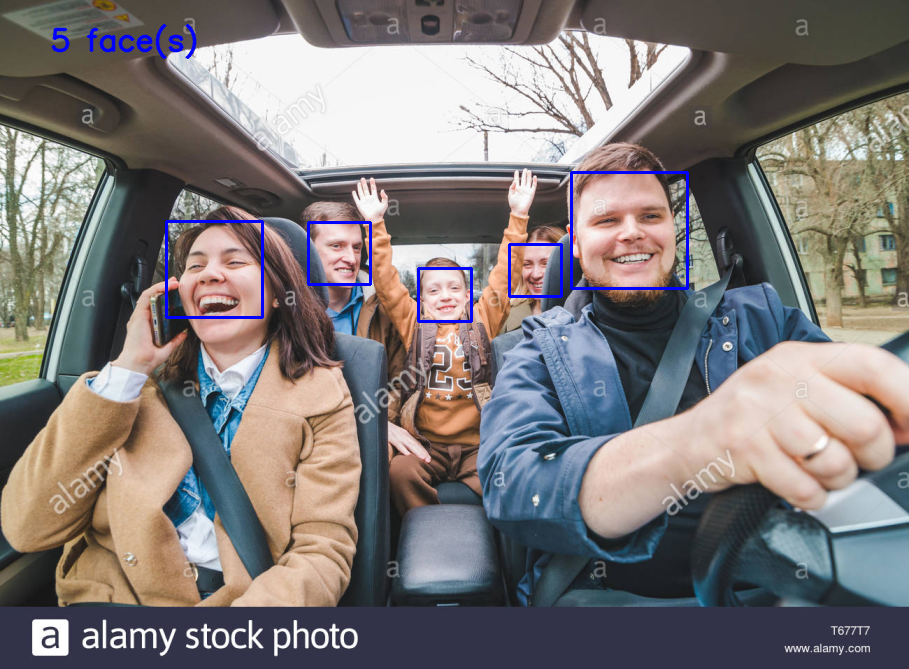

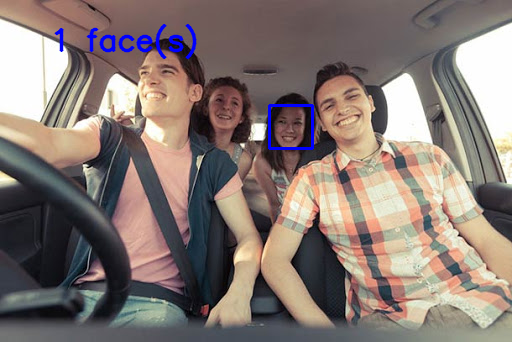

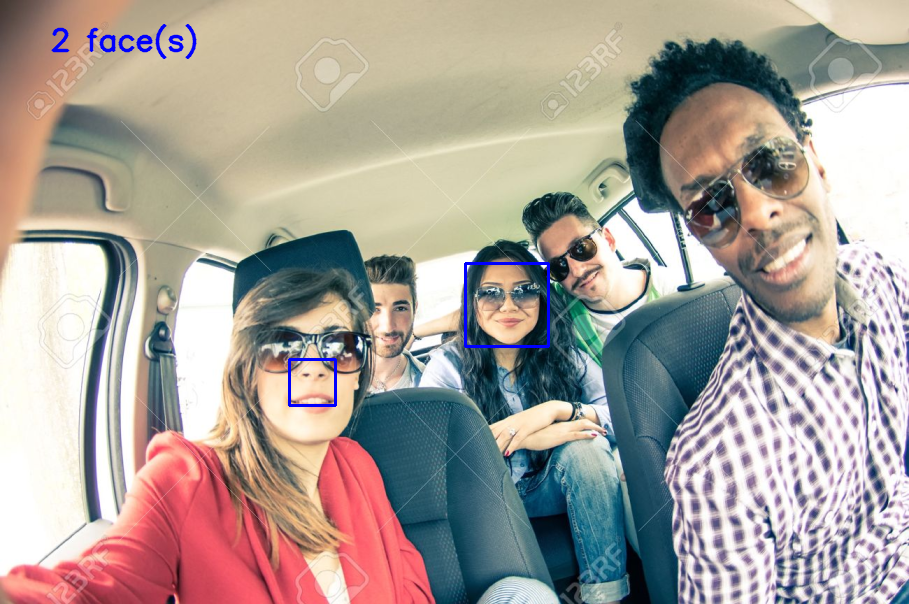

In [15]:
bounding_box(70, img0, gray0)
bounding_box(100, img1, gray1)
bounding_box(70, img2, gray2)